In [2]:
x = 1
import numpy as np  
import matplotlib.pyplot as plt  
x=np.linspace(-np.pi,np.pi,256,endpoint=True)  
C,S=np.cos(x),np.sin(x)  
plt.plot(x,C)  
plt.plot(x,S)  
plt.show()

<Figure size 640x480 with 1 Axes>

[ 2  4  6  8 20]


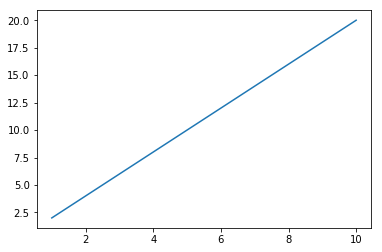

In [22]:
a = np.array([1,2,3,4])
b = a*2
b = np.append(b,20)
a = np.append(a,10)
print(b)
plt.plot(a,b)

29 2.181250000000004e-05


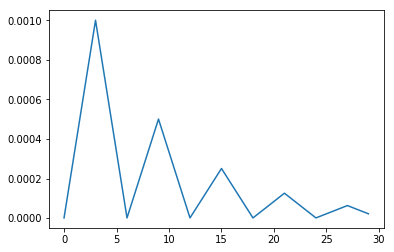

In [25]:
# Default triangular clr policy example:
# clr = CyclicLR(base_lr=0.001, max_lr=0.006,
#                     step_size=2000., mode='triangular2')
# model.fit(X_train, Y_train, callbacks=[clr])

base_lr = 1e-6
max_lr = 1e-3
step_size = 3

def get_lr(iterations):
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))/float(2**(cycle-1))
    return lr

N = 10
x = range(0,int(step_size*N) )
y = []
for iterations in range(step_size*N):
    y += [get_lr(iterations)]
print(x[iterations],y[iterations])
# print(y)
plt.plot(x,y)
plt.show()



5999 9.990100000000002e-05


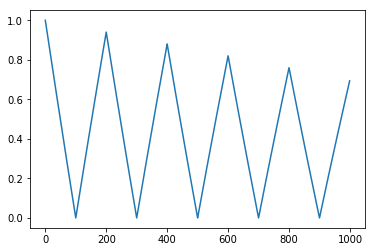

In [28]:
epoch = 0
n_epoch = 6000
mini_batch = 50
step = 300000
def get_learning_rate(epoch):
#     bias = 100
#     epoch = epoch + bias
    cycle_period = 10000
    
    if epoch <= 3000:
        mx = 1 - 9e-1 / 3000 * epoch
    elif epoch <= 4000:
        mx = 1e-1 - 9e-2 / 1000 * (epoch - 3000)
    elif epoch <= 5000:
        mx = 1e-2 - 9e-3 / 1000 * (epoch - 4000)
    elif epoch <= 6000:
        mx = 1e-3 - 9e-4 / 1000 * (epoch - 5000)
    else:
        mx = 1e-4
        
    epoch = epoch + cycle_period / mini_batch / 2
    step = epoch*mini_batch
    k = step % 10000
    st, ed = 1e-6, mx
    interval = 5000
    if k > interval:
        st, ed = ed, st
        k = k - interval
    return st + k * (ed-st) / interval


x = range(0,int(n_epoch) )
y = []
for iterations in range(n_epoch):
    y += [get_learning_rate(iterations)]
print(x[iterations],y[iterations])
# print(y)
# plt.plot(x[1000:2000],y[1000:2000])
plt.plot(x[0:1000],y[0:1000])
plt.show()

In [43]:
np.shape(y)
y[1]

1e-06

In [7]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [35]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print(sess)

In [ ]:
from neupeak.train.logger.tensorboard_logger import TensorBoardLogger
from neupeak.train.logger.worklog_logger import WorklogLogger, log_rate_limited
from neupeak.utils.fs import change_dir, make_symlink_if_not_exists

In [2]:
batch_size = 32
epoch = 99
print(np.ones(batch_size,dtype='float32') )

print( np.ones((batch_size,),dtype='float32') * (epoch > 999) )

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
args = [1,2,3,4]
map_var = map(str, args)
# for ele in map_var:
#     print (ele)

print ('_'.join(map_var) )
print ('_'.join(map_var) )
# print (map_var)
# for ele in map_var:
#     print (ele)

1_2_3_4



In [11]:
import numpy as np
def samplerx1(_):
    st,ed = _
    return np.random.randint(ed-st)+st

samplerx1((0,100))

77

# power_k function

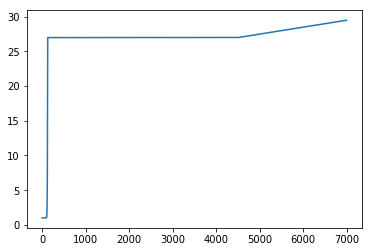

In [22]:
epoch = 0
power_k = 3

def get_power_k():
    global power_k 
    if epoch < 4500:
        power_k = min(max(epoch / 100. * power_k, 1), 27)
    else:
        power_k = min(27 + (epoch - 4500) * 0.001, 60)
    return power_k

x,y = [],[]
for epoch in range(1,7000):
    x += [epoch]
    y += [get_power_k()]

import numpy as np  
import matplotlib.pyplot as plt  
plt.plot(x,y)  
plt.show()

# print(y)

# Fast Tanh

In [1]:
def fasttanh(x):
    tmp = x**2
    return x * (27 + tmp) / (27 + 9 * tmp)
print(fasttanh(45))
print(fasttanh(1))

5.059171597633136
0.7777777777777778


In [14]:
arr_eye = np.eye(3)*2
arr_eye.reshape(1,-1)
arr_eye.reshape(-1,1,3,3)

arr_eye<1

array([[False,  True,  True],
       [ True, False,  True],
       [ True,  True, False]])

In [17]:
import os
compid = "0123"
path = os.getcwd().split('/')[-1]
path = os.path.join('./', 'pararms', path, '_'.join(map(str, compid)))
path

'./pararms/isilon-home/0_1_2_3'

# lam in sphere loss

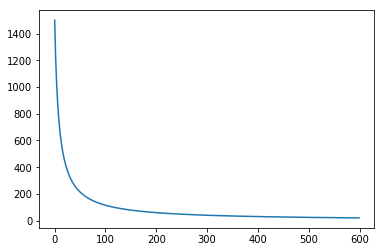

In [7]:
x = []
y = []
lambda_min = 5.
lambda_max = 1500.
for step in range(0,600):
    lam = max(lambda_min, lambda_max / (1. + 0.12 * step))
    x += [step]
    y += [lam]
    
plt.plot(x,y)  
plt.show()

# Useless

In [36]:
np.eye(3).reshape((1, 3, 3))

array([[[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]])

In [31]:
np.array([[128.0, 0, 0], [0, 128.0, 0], [0, 0, 1]]).reshape((1, 3, 3))

array([[[128.,   0.,   0.],
        [  0., 128.,   0.],
        [  0.,   0.,   1.]]])

In [32]:
np.array([[1./128, 0, 0], [0, 1./128, 0], [0, 0, 1]]).reshape((1, 3, 3))

array([[[0.0078125, 0.       , 0.       ],
        [0.       , 0.0078125, 0.       ],
        [0.       , 0.       , 1.       ]]])